# Claude 3.5 Sonnet Demonstration

We are going to use [Claude AI](https://claude.ai) to demonstrate generative AI's ability to write Python code. We will instruct Claude to write the Python code necessary to recreate the [class profile analysis](../day1/class-profile.ipynb).

## The Prompt

The output from any generative AI is highly dependent on the instructions given to it, known as the prompt. The quality and specificity of the prompt significantly influence the AI's response.  Here is an example of a prompt we can use to recreate the analysis. 

```md
## Objective
Create a Python script to process a TSV file containing class data, perform data manipulations, and generate visualizations using pandas and seaborn.

## Input Data
- File name: '20CS2023-FS24-class-data.tsv'
- File format: Tab-Separated Values (TSV)

## Required Libraries
- pandas
- seaborn
- matplotlib

## Tasks

### 1. Data Loading and Preprocessing
a) Read the TSV file into a pandas DataFrame.
b) Clean the DataFrame:
   - Remove any column that starts with "Unnamed"
   - Remove the "ID" column
   - Split the "Program and Plan" column into separate columns:
     - New column names: "Program" and "Plan"
     - Split using the delimiter: "- \n\n"

### 2. Data Visualization
a) Create a distribution plot for the "Plan" values:
   - Use a seaborn countplot or barplot
   - Ensure proper labeling and title
   - Handle long labels if necessary (e.g., rotation)

b) Create a distribution plot for the "Level" values:
   - Use a seaborn countplot or barplot
   - Ensure proper labeling and title
   - Order the "Levels" correctly (e.g., Freshman, Sophomore, Junior, Senior)
   - Handle long labels if necessary (e.g., rotation)

## Additional Requirements
1. Follow PEP 8 and Google's Python Style Guide for code formatting.
2. Use type hints for function arguments and return values.
3. Include docstrings for all functions and classes.
4. Implement error handling for file operations and data processing.
5. Use pandas and seaborn efficiently, leveraging vectorized operations where possible.
6. Make the script both importable as a module and executable as a standalone program.
7. Consider memory efficiency for potentially large datasets.

## Expected Output
1. A cleaned and processed pandas DataFrame
2. Two distribution plots:
   - Distribution of "Plan" values
   - Distribution of "Level" values (in correct order)

## Evaluation Criteria
- Correctness of data processing and visualization
- Code readability and adherence to Python best practices
- Efficiency of data manipulation and plotting operations
- Proper error handling and edge case consideration
```

## The Output

Below is the code that Claude generated. It produced functional and readable code, following the instructions we provided. However, it followed our instructions a bit too literally. Notice that "Pre-Junior" is missing from the distribution of levels plot. This demonstrates the importance of precise prompting, as we inadvertently omitted this category in our instructions.

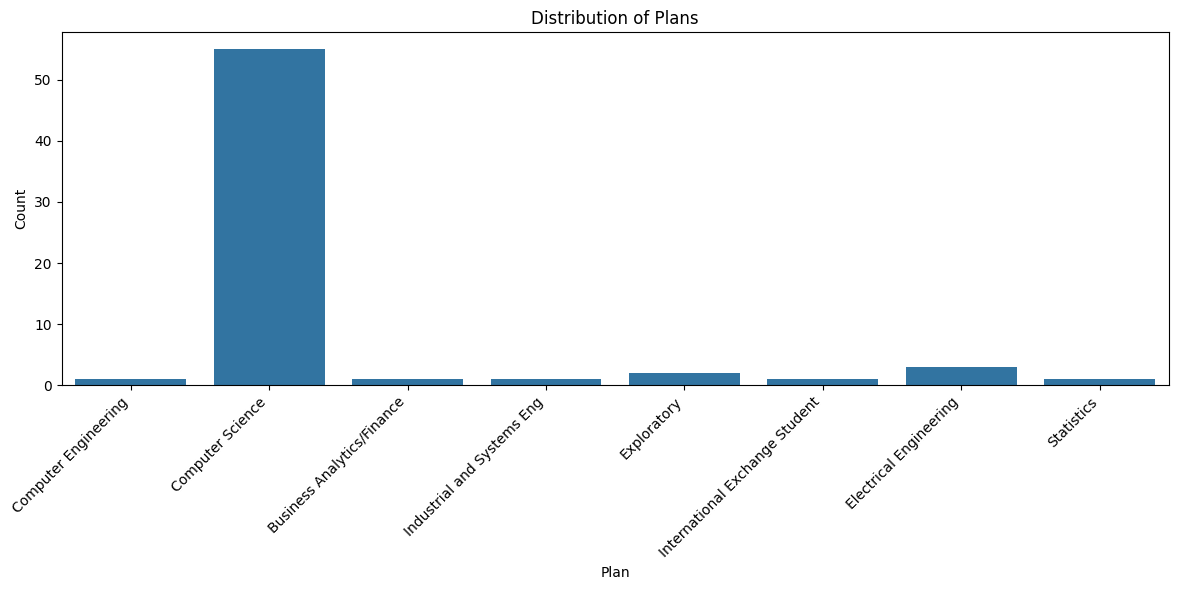

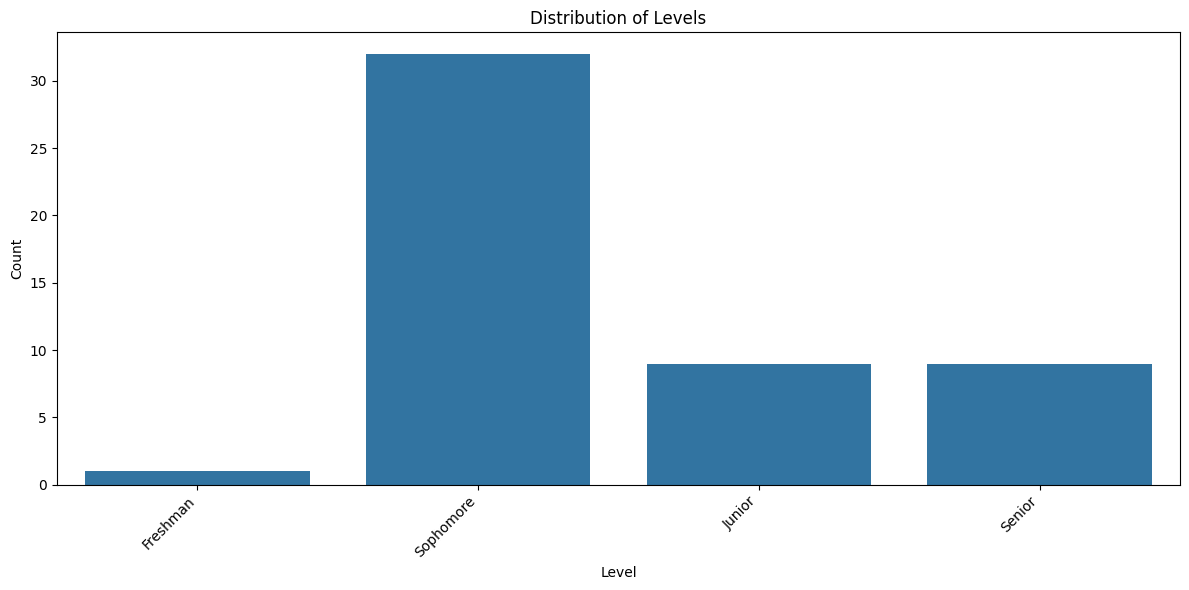

Data processing and visualization completed successfully.
Processed DataFrame shape: (65, 3)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple

def load_and_clean_data(file_path: str) -> pd.DataFrame:
    """
    Load TSV file and clean the data.

    Args:
        file_path (str): Path to the TSV file.

    Returns:
        pd.DataFrame: Cleaned DataFrame.

    Raises:
        FileNotFoundError: If the specified file is not found.
        pd.errors.EmptyDataError: If the file is empty.
    """
    try:
        df = pd.read_csv(file_path, sep='\t')
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {file_path}")
    except pd.errors.EmptyDataError:
        raise pd.errors.EmptyDataError("The file is empty.")

    # Remove columns starting with "Unnamed"
    df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

    # Remove "ID" column
    df = df.drop(columns=['ID'], errors='ignore')

    # Split "Program and Plan" column
    if 'Program and Plan' in df.columns:
        df[['Program', 'Plan']] = df['Program and Plan'].str.split('- \n\n', expand=True)
        df = df.drop(columns=['Program and Plan'])

    return df

def create_distribution_plot(df: pd.DataFrame, column: str, title: str, order: list = None) -> None:
    """
    Create a distribution plot for the specified column.

    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column name to plot.
        title (str): Plot title.
        order (list, optional): Order of categories for x-axis. Defaults to None.
    """
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=column, data=df, order=order)
    ax.set_title(title)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    # Rotate x-axis labels if they are too long
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def process_class_data(file_path: str) -> Tuple[pd.DataFrame, None, None]:
    """
    Process class data from TSV file and generate visualizations.

    Args:
        file_path (str): Path to the TSV file.

    Returns:
        Tuple[pd.DataFrame, None, None]: Cleaned DataFrame and two None values (for consistency with visualization calls).
    """
    df = load_and_clean_data(file_path)

    # Create distribution plot for "Plan" values
    create_distribution_plot(df, 'Plan', 'Distribution of Plans')

    # Create distribution plot for "Level" values
    level_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']
    create_distribution_plot(df, 'Level', 'Distribution of Levels', order=level_order)

    return df, None, None

file_path = '20CS2023-FS24-class-data.tsv'
try:
    df, _, _ = process_class_data(file_path)
    print("Data processing and visualization completed successfully.")
    print(f"Processed DataFrame shape: {df.shape}")
except Exception as e:
    print(f"An error occurred: {str(e)}")